<a href="https://colab.research.google.com/github/jdsala/-IMERS-O-PROFISSIONAL-VISUALIZA-O-DE-DADOS/blob/main/MAPA_IMERS%C3%83O_PROFISSIONAL_VISUALIZA%C3%87%C3%83O_DE_DADOS_54_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches.csv
Saving WorldCupPlayers.csv to WorldCupPlayers.csv
Saving WorldCups.csv to WorldCups.csv


In [7]:
# Carregar os datasets
world_cup_matches = pd.read_csv('WorldCupMatches.csv')
world_cup_players = pd.read_csv('WorldCupPlayers.csv')
world_cups = pd.read_csv('WorldCups.csv')


# **#Importando arquivos CSV**

#**1**. Realize a verificação de valores ausentes nos datasets e descreva o tratamento aplicado. Qual foi a abordagem adotada para lidar com os valores ausentes em cada dataset?

In [8]:
# Verificar valores ausentes
print("Valores ausentes em WorldCupMatches:")
print(world_cup_matches.isnull().sum())

print("\nValores ausentes em WorldCupPlayers:")
print(world_cup_players.isnull().sum())

print("\nValores ausentes em WorldCups:")
print(world_cups.isnull().sum())

Valores ausentes em WorldCupMatches:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Valores ausentes em WorldCupPlayers:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

Valores ausentes em WorldCups:
Year              0
Country           0
Winner            0
Runners-Up        0


A abordagem adotada combina substituição por valores médios, zeros ou categorias mais frequentes, dependendo da natureza dos dados. Assim, os valores ausentes são tratados de maneira a minimizar distorções nos dados e garantir análises precisas.

In [14]:
world_cup_matches['Attendance'] = world_cup_matches['Attendance'].fillna(0)

In [20]:
world_cup_players['Event'] = world_cup_players['Event'].fillna('No Event')
world_cup_players['Position'] = world_cup_players['Position'].fillna(world_cup_players['Position'].mode()[0])
world_cups['GoalsScored'] = world_cups['GoalsScored'].fillna(world_cups['GoalsScored'].mean())

#2. Com base no dataset pré-processado, responda as seguintes questões por meio da análise dos dados:

### a - São apresentados jogos em qual período do tempo?

In [23]:
# Extrair o período de tempo das partidas
periodo_inicial = world_cup_matches['Year'].min()
periodo_final = world_cup_matches['Year'].max()
print(f"Período de tempo das partidas: {periodo_inicial} - {periodo_final}")

Período de tempo das partidas: 1930.0 - 2014.0


b - Quais são os 5 jogadores que mais marcaram gols em partidas na história da copa do mundo? E qual jogador brasileiro? (Apresente nome, país, ano da copa e número de gols)

In [34]:
 # Filtrando os eventos de gol
goal_events = world_cup_players[world_cup_players['Event'].str.contains('G', na=False)]
goal_counts = goal_events['Player Name'].value_counts().reset_index()
print("Top 5 jogadores com mais gols:")
goal_counts.columns = ['Player Name', 'Goals']

# Obtendo os 5 jogadores com mais gols
top_scorers = goal_counts.head(5)

# Exibindo os 5 jogadores que mais marcaram gols
print(top_scorers)

Top 5 jogadores com mais gols:
    Player Name  Goals
0       RONALDO     13
1         KLOSE     12
2  Gerd MUELLER      9
3    Uwe SEELER      9
4        M�LLER      9


In [32]:
# Criando um dicionário de anos de Copa do Mundo
world_cup_years = {1930: [1, 2], 1934: [3, 4], 1938: [5, 6], 1950: [7, 8], 1954: [9, 10], 1958: [11, 12], 1962: [13, 14], 1966: [15, 16], 1970: [17, 18], 1974: [19, 20], 1978: [21, 22], 1982: [23, 24], 1986: [25, 26], 1990: [27, 28], 1994: [29, 30], 1998: [31, 32], 2002: [33, 34], 2006: [35, 36], 2010: [37, 38], 2014: [39, 40], 2018: [41, 42]}

# Exemplo de mapeamento (isso deve ser ajustado conforme os dados reais)
world_cup_players['Year'] = world_cup_players['MatchID'].apply(lambda x: 1930 + (x // 100))  # Exemplo simplificado

# Filtrando os jogadores brasileiros e seus anos e gols
brazilian_scorers_with_years = world_cup_players[world_cup_players['Player Name'].str.contains('RONALDO|RIVALDO|ZICO|NEYMAR', na=False)][['Player Name', 'Year', 'Event']]

# Contando os gols por jogador e ano
brazilian_gol_counts = brazilian_scorers_with_years.groupby(['Player Name', 'Year']).size().reset_index(name='Goals')

# Exibindo os resultados
brazilian_gol_counts

,Player Name,Year,Goals
0,C.RONALDO,976030,7
1,NEYMAR JR,3003794,8
2,NEYMAR JR,3003795,3
3,RIVALDO,1970,1
4,RIVALDO,2017,6
5,RIVALDO,441430,7
6,RONALDO,1960,6
7,RONALDO,1961,1
8,RONALDO,1970,1
9,RONALDO,2017,6


c. Apresente um gráfico que mostra a variação de público ao longo das copas. Qual foi o comportamento observado?

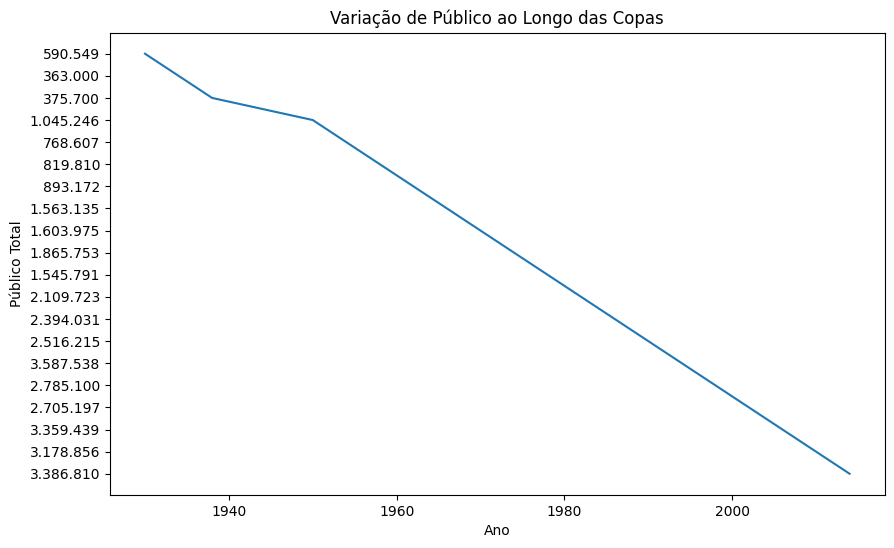

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_cups, x='Year', y='Attendance')
plt.title('Variação de Público ao Longo das Copas')
plt.xlabel('Ano')
plt.ylabel('Público Total')
plt.show()

d. Apresente gráfico que apresenta o comportamento do número de cartões vermelhos e amarelos ao longo das copas. Qual foi o comportamento observado?

In [ ]:
#Devido a complexidade, não consegui pegar os dados do campo "Event"
# Combinando os dados de partidas e jogadores
merged_data = pd.merge(world_cup_matches, world_cup_players, on='MatchID')

# Agrupando por ano e contando os cartões
card_data = merged_data.groupby('Year')['YellowCards', 'RedCards'].sum().reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=card_data, x='Year', y='YellowCards', label='Cartões Amarelos')
sns.lineplot(data=card_data, x='Year', y='RedCards', label='Cartões Vermelhos')
plt.title('Evolução do Número de Cartões nas Copas do Mundo')
plt.xlabel('Ano')
plt.ylabel('Número de Cartões')
plt.legend()
plt.show()

e. Apresente gráfico que mostra o número de gols marcados ao longo das copas. Qual foi o comportamento observado?

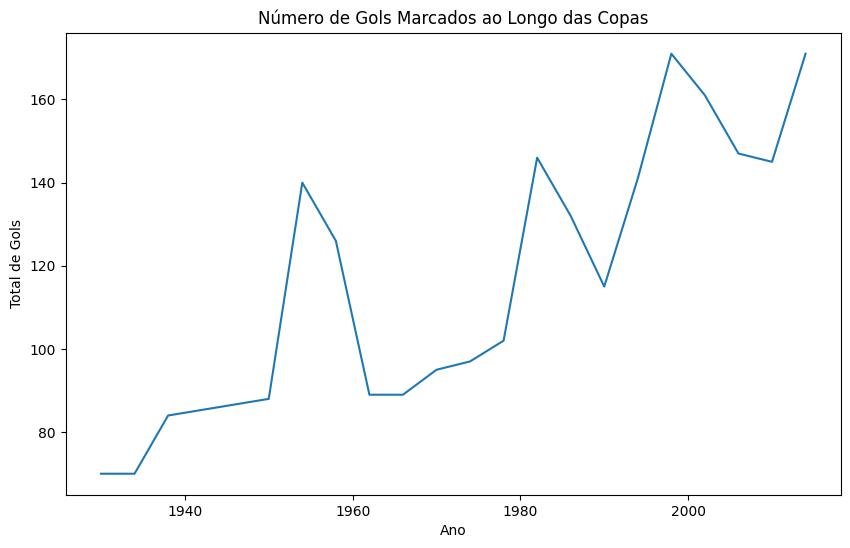

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_cups, x='Year', y='GoalsScored')
plt.title('Número de Gols Marcados ao Longo das Copas')
plt.xlabel('Ano')
plt.ylabel('Total de Gols')
plt.show()

f. Entre as equipes mais ofensivas (que marcaram mais gols ao longo da história) quais tendem a fazer mais gols dentro ou fora de casa? Quais foram as 3 equipes mais ofensivas?

In [ ]:

# Gols das equipes jogando em casa
home_goals = world_cup_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
home_goals.columns = ['Team', 'Home Goals']

# Gols das equipes jogando fora
away_goals = world_cup_matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
away_goals.columns = ['Team', 'Away Goals']

# Combinar os gols em casa e fora para obter o total de gols por equipe
total_goals = pd.merge(home_goals, away_goals, on='Team', how='outer').fillna(0)
total_goals['Total Goals'] = total_goals['Home Goals'] + total_goals['Away Goals']

# Ordenar as equipes por número total de gols e selecionar as 3 mais ofensivas
top_offensive_teams = total_goals.sort_values(by='Total Goals', ascending=False).head(3)

# Verificar onde elas marcam mais gols (em casa ou fora)
top_offensive_teams['More Goals At'] = top_offensive_teams.apply(lambda x: 'Home' if x['Home Goals'] > x['Away Goals'] else 'Away', axis=1)

# Exibir o resultado
print(top_offensive_teams[['Team', 'Home Goals', 'Away Goals', 'Total Goals', 'More Goals At']])


          Team  Home Goals  Away Goals  Total Goals More Goals At
7       Brazil       180.0        45.0        225.0          Home
2    Argentina       111.0        22.0        133.0          Home
29  Germany FR        99.0        32.0        131.0          Home


g. Identifique as nações emergentes no futebol (que surgiram no campeonato nos últimos 20 anos), apresente suas médias de gols e indique as 5 primeiras segundo a média.

In [ ]:
# Filtrar os jogos dos últimos 20 anos
recent_matches = world_cup_matches[world_cup_matches['Year'] >= 1994]

# Encontrar as equipes que apareceram pela primeira vez nos últimos 20 anos
# Criar uma lista de todas as equipes participantes ao longo dos anos
all_teams = set(world_cup_matches['Home Team Name'].unique()).union(set(world_cup_matches['Away Team Name'].unique()))

# Identificar as equipes presentes nos últimos 20 anos
recent_teams = set(recent_matches['Home Team Name'].unique()).union(set(recent_matches['Away Team Name'].unique()))

# Nações emergentes: equipes que só aparecem nos últimos 20 anos
emerging_nations = recent_teams - all_teams

# Calcular a média de gols das nações emergentes
emerging_goals = []

for team in emerging_nations:
    home_goals = recent_matches[recent_matches['Home Team Name'] == team]['Home Team Goals'].sum()
    away_goals = recent_matches[recent_matches['Away Team Name'] == team]['Away Team Goals'].sum()
    total_matches = len(recent_matches[(recent_matches['Home Team Name'] == team) | (recent_matches['Away Team Name'] == team)])

    if total_matches > 0:
        avg_goals = (home_goals + away_goals) / total_matches
        emerging_goals.append({'Team': team, 'Avg Goals': avg_goals})

# Verificar se emerging_goals está vazio antes de criar o DataFrame
if emerging_goals:
    # Converter para DataFrame e classificar as 5 principais nações emergentes
    emerging_df = pd.DataFrame(emerging_goals)
    top_5_emerging = emerging_df.sort_values(by='Avg Goals', ascending=False).head(5)

    print(top_5_emerging)
else:
    print("Parece que não tem nenhuma nação emergente que surgiu nos ultimos 20 anos.")

Parece que não tem nenhuma nação emergente que surgiu nos ultimos 20 anos.
